# Module Importation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


# Data Importation

In [2]:
flare=pd.read_csv("ngdc_solar_flares.csv")
sunspots=pd.read_csv('ngdc_sunspots.csv')
silso=pd.read_csv("silsos_sunspots.csv")

In [3]:
flare.head()

,Unnamed: 0,code,date,start time,end time,peak time,Location,class,station,AR_Number
0,0,31777,1/5/2010,134,143,139,N23E,C5.7,GOES,11067.0
1,1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0
2,2,31777,1/5/2010,948,959,952,NaN,B1.0,GOES,11067.0
3,3,31777,2/5/2010,603,618,609,NaN,B2.9,GOES,11067.0
4,4,31777,2/5/2010,1002,1015,1009,NaN,B3.8,GOES,11067.0


In [4]:
sunspots.head()

,Unnamed: 0,code,date,observation time,location,meridian distance,WMC,AR_Number,MC,SN,longitude,area,station SN,quality,station
0,0,11,1/5/2010,219,N16E,27,B,11064.0,CRO,2,3,10,30,2,LEAR
1,1,11,1/5/2010,925,N17E,23,B,11064.0,CRO,3,3,20,22,3,SVTO
2,2,11,1/5/2010,1531,N16E,19,A,11064.0,AXX,1,1,10,28,3,HOLL
3,3,11,1/5/2010,1531,N23E,71,A,NaN,AXX,1,1,30,29,3,HOLL
4,4,11,1/5/2010,1531,S27E,36,A,NaN,AXX,1,1,10,30,3,HOLL


In [5]:
flare=flare.drop(['Unnamed: 0'],axis=1)
flare.head()

,code,date,start time,end time,peak time,Location,class,station,AR_Number
0,31777,1/5/2010,134,143,139,N23E,C5.7,GOES,11067.0
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0
2,31777,1/5/2010,948,959,952,NaN,B1.0,GOES,11067.0
3,31777,2/5/2010,603,618,609,NaN,B2.9,GOES,11067.0
4,31777,2/5/2010,1002,1015,1009,NaN,B3.8,GOES,11067.0


In [6]:
sunspots=sunspots.drop(['Unnamed: 0'],axis=1)
sunspots.head()

,code,date,observation time,location,meridian distance,WMC,AR_Number,MC,SN,longitude,area,station SN,quality,station
0,11,1/5/2010,219,N16E,27,B,11064.0,CRO,2,3,10,30,2,LEAR
1,11,1/5/2010,925,N17E,23,B,11064.0,CRO,3,3,20,22,3,SVTO
2,11,1/5/2010,1531,N16E,19,A,11064.0,AXX,1,1,10,28,3,HOLL
3,11,1/5/2010,1531,N23E,71,A,NaN,AXX,1,1,30,29,3,HOLL
4,11,1/5/2010,1531,S27E,36,A,NaN,AXX,1,1,10,30,3,HOLL


In [7]:
silso.head()

,date,Decimal date,DSN,STD,OBSERVATION,INDICATOR
0,1/5/2010,2010.330,13,2.7,22,1
1,2/5/2010,2010.333,21,5.8,19,1
2,3/5/2010,2010.336,40,5.4,15,1
3,4/5/2010,2010.338,51,5.6,22,1
4,5/5/2010,2010.341,47,3.7,19,1


# Dataset Association: NGDC sunspot data and Solso sunspot number

In [8]:
sunspot_with_DSN=pd.merge(sunspots,silso,on='date')

In [9]:
sunspot_with_DSN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30028 entries, 0 to 30027
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               30028 non-null  int64  
 1   date               30028 non-null  object 
 2   observation time   30028 non-null  int64  
 3   location           30028 non-null  object 
 4   meridian distance  30028 non-null  int64  
 5   WMC                30028 non-null  object 
 6   AR_Number          27966 non-null  float64
 7   MC                 30028 non-null  object 
 8   SN                 30028 non-null  int64  
 9   longitude          30028 non-null  int64  
 10  area               30028 non-null  int64  
 11  station SN         30028 non-null  int64  
 12  quality            30028 non-null  int64  
 13  station            30028 non-null  object 
 14  Decimal date       30028 non-null  float64
 15  DSN                30028 non-null  int64  
 16  STD                300

# cleaning the data

In [10]:
sunspot_with_DSN.drop(['code','meridian distance','SN','station SN','longitude','quality','station','Decimal date','STD','OBSERVATION'],axis=1,inplace=True)

In [11]:
sunspot_with_DSN.head()

,date,observation time,location,WMC,AR_Number,MC,area,DSN,INDICATOR
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
1,1/5/2010,925,N17E,B,11064.0,CRO,20,13,1
2,1/5/2010,1531,N16E,A,11064.0,AXX,10,13,1
3,1/5/2010,1531,N23E,A,NaN,AXX,30,13,1
4,1/5/2010,1531,S27E,A,NaN,AXX,10,13,1


# Associating sunspot data and flare dataset based on date and Active region Number

In [12]:
flare_ar=list(flare['AR_Number'])
spot_ar=list(sunspot_with_DSN['AR_Number'])
flare_date=list(flare['date'])
spot_date=list(sunspot_with_DSN['date'])

In [13]:
flares=list(zip(flare_ar,flare_date))

In [14]:
sunspots=list(zip(spot_ar,spot_date))
print(len(flares))
print(len(sunspots))

12937
30028


In [15]:
h=[]
q=[]
for i in range(len(sunspots)):
    if sunspots[i] not in flares:
        pass
    else:
        h.append(sunspots.index(sunspots[i]))
        q.append(flares.index(sunspots[i]))
s=[]
for x in h:
    com=sunspot_with_DSN.iloc[x,:]
    s.append(com)

sunspot_to_flare=pd.DataFrame(s)
sunspot_to_flare

,date,observation time,location,WMC,AR_Number,MC,area,DSN,INDICATOR
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
13,2/5/2010,1755,N23E,B,11067.0,BXO,60,21,1
14,3/5/2010,354,N17W,B,11063.0,BXO,20,40,1
...,...,...,...,...,...,...,...,...,...
29971,18/6/2017,133,N11E,B,12663.0,DAO,90,29,1
29971,18/6/2017,133,N11E,B,12663.0,DAO,90,29,1
29971,18/6/2017,133,N11E,B,12663.0,DAO,90,29,1
30026,27/6/2017,324,N18W,B,12664.0,DSI,120,19,1


In [16]:
sunspot_to_flare=sunspot_to_flare.drop_duplicates()
sunspot_to_flare.head()

,date,observation time,location,WMC,AR_Number,MC,area,DSN,INDICATOR
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
13,2/5/2010,1755,N23E,B,11067.0,BXO,60,21,1
14,3/5/2010,354,N17W,B,11063.0,BXO,20,40,1
17,3/5/2010,354,S27E,B,11066.0,BXO,20,40,1
28,4/5/2010,324,S18E,B,11068.0,BXO,30,51,1


In [17]:
fr=[]
for x in q:
    com=flare.iloc[x,:]
    fr.append(com)

In [18]:
flare_to_sunspot=pd.DataFrame(fr)

In [19]:
flare_to_sunspot

,code,date,start time,end time,peak time,Location,class,station,AR_Number
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0
3,31777,2/5/2010,603,618,609,NaN,B2.9,GOES,11067.0
10,31777,3/5/2010,1252,1302,1257,NaN,B2.0,GOES,11063.0
...,...,...,...,...,...,...,...,...,...
12924,31777,18/6/2017,1333,1354,1344,N14W,B2.9,G15,12663.0
12924,31777,18/6/2017,1333,1354,1344,N14W,B2.9,G15,12663.0
12924,31777,18/6/2017,1333,1354,1344,N14W,B2.9,G15,12663.0
12935,31777,27/6/2017,2109,2119,2115,N19W,B2.6,G15,12664.0


In [20]:
flare_to_sunspot=flare_to_sunspot.drop_duplicates()

In [21]:
flare_to_sunspot.head()

,code,date,start time,end time,peak time,Location,class,station,AR_Number
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0
3,31777,2/5/2010,603,618,609,NaN,B2.9,GOES,11067.0
10,31777,3/5/2010,1252,1302,1257,NaN,B2.0,GOES,11063.0
13,31777,3/5/2010,2150,2156,2153,NaN,B1.0,GOES,11066.0
14,31777,4/5/2010,442,449,446,NaN,B1.7,GOES,11068.0


In [22]:
sunspot_fls=sunspot_to_flare
sunspot_fls

,date,observation time,location,WMC,AR_Number,MC,area,DSN,INDICATOR
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
13,2/5/2010,1755,N23E,B,11067.0,BXO,60,21,1
14,3/5/2010,354,N17W,B,11063.0,BXO,20,40,1
17,3/5/2010,354,S27E,B,11066.0,BXO,20,40,1
28,4/5/2010,324,S18E,B,11068.0,BXO,30,51,1
...,...,...,...,...,...,...,...,...,...
29944,7/6/2017,38,N07E,A,12661.0,HSX,50,14,1
29947,8/6/2017,238,N07W,A,12661.0,AXX,20,14,1
29955,15/6/2017,421,N14E,B,12663.0,BXO,30,31,1
29971,18/6/2017,133,N11E,B,12663.0,DAO,90,29,1


In [23]:
flare_fls=flare_to_sunspot
sunspot_fls

,date,observation time,location,WMC,AR_Number,MC,area,DSN,INDICATOR
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
13,2/5/2010,1755,N23E,B,11067.0,BXO,60,21,1
14,3/5/2010,354,N17W,B,11063.0,BXO,20,40,1
17,3/5/2010,354,S27E,B,11066.0,BXO,20,40,1
28,4/5/2010,324,S18E,B,11068.0,BXO,30,51,1
...,...,...,...,...,...,...,...,...,...
29944,7/6/2017,38,N07E,A,12661.0,HSX,50,14,1
29947,8/6/2017,238,N07W,A,12661.0,AXX,20,14,1
29955,15/6/2017,421,N14E,B,12663.0,BXO,30,31,1
29971,18/6/2017,133,N11E,B,12663.0,DAO,90,29,1


In [24]:
flare_c=[]
for x in flare_fls['class']:
    x=x.split('.')
    x=x[0]
    x=x[:-1]
    flare_c.append(x)   

In [25]:
flare_fls['flare type']=flare_c

In [26]:
flare_fls

,code,date,start time,end time,peak time,Location,class,station,AR_Number,flare type
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0,B
3,31777,2/5/2010,603,618,609,NaN,B2.9,GOES,11067.0,B
10,31777,3/5/2010,1252,1302,1257,NaN,B2.0,GOES,11063.0,B
13,31777,3/5/2010,2150,2156,2153,NaN,B1.0,GOES,11066.0,B
14,31777,4/5/2010,442,449,446,NaN,B1.7,GOES,11068.0,B
...,...,...,...,...,...,...,...,...,...,...
12908,31777,7/6/2017,1622,1724,1658,N03W,B4.5,G15,12661.0,B
12909,31777,8/6/2017,338,409,350,N04W,B2.9,G15,12661.0,B
12920,31777,15/6/2017,1657,1706,1700,N14E,B2.9,G15,12663.0,B
12924,31777,18/6/2017,1333,1354,1344,N14W,B2.9,G15,12663.0,B


In [27]:
sunspot_fls.head()

,date,observation time,location,WMC,AR_Number,MC,area,DSN,INDICATOR
0,1/5/2010,219,N16E,B,11064.0,CRO,10,13,1
13,2/5/2010,1755,N23E,B,11067.0,BXO,60,21,1
14,3/5/2010,354,N17W,B,11063.0,BXO,20,40,1
17,3/5/2010,354,S27E,B,11066.0,BXO,20,40,1
28,4/5/2010,324,S18E,B,11068.0,BXO,30,51,1


In [28]:
flare_fls.head()

,code,date,start time,end time,peak time,Location,class,station,AR_Number,flare type
1,31777,1/5/2010,523,531,527,NaN,B1.6,GOES,11064.0,B
3,31777,2/5/2010,603,618,609,NaN,B2.9,GOES,11067.0,B
10,31777,3/5/2010,1252,1302,1257,NaN,B2.0,GOES,11063.0,B
13,31777,3/5/2010,2150,2156,2153,NaN,B1.0,GOES,11066.0,B
14,31777,4/5/2010,442,449,446,NaN,B1.7,GOES,11068.0,B


In [29]:
sunspot_fls.shape

(2631, 9)

In [30]:
flare_fls.shape

(2631, 10)

In [31]:
flare_fls.drop(['code','Location','station'],axis=1,inplace=True)

In [32]:
flare_fls

,date,start time,end time,peak time,class,AR_Number,flare type
1,1/5/2010,523,531,527,B1.6,11064.0,B
3,2/5/2010,603,618,609,B2.9,11067.0,B
10,3/5/2010,1252,1302,1257,B2.0,11063.0,B
13,3/5/2010,2150,2156,2153,B1.0,11066.0,B
14,4/5/2010,442,449,446,B1.7,11068.0,B
...,...,...,...,...,...,...,...
12908,7/6/2017,1622,1724,1658,B4.5,12661.0,B
12909,8/6/2017,338,409,350,B2.9,12661.0,B
12920,15/6/2017,1657,1706,1700,B2.9,12663.0,B
12924,18/6/2017,1333,1354,1344,B2.9,12663.0,B


In [33]:
associated_flare_sunspot=pd.merge(flare_fls,sunspot_fls)

In [34]:
associated_flare_sunspot.drop_duplicates()

,date,start time,end time,peak time,class,AR_Number,flare type,observation time,location,WMC,MC,area,DSN,INDICATOR
0,1/5/2010,523,531,527,B1.6,11064.0,B,219,N16E,B,CRO,10,13,1
1,2/5/2010,603,618,609,B2.9,11067.0,B,1755,N23E,B,BXO,60,21,1
2,3/5/2010,1252,1302,1257,B2.0,11063.0,B,354,N17W,B,BXO,20,40,1
3,3/5/2010,2150,2156,2153,B1.0,11066.0,B,354,S27E,B,BXO,20,40,1
4,4/5/2010,442,449,446,B1.7,11068.0,B,324,S18E,B,BXO,30,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,7/6/2017,1622,1724,1658,B4.5,12661.0,B,38,N07E,A,HSX,50,14,1
2627,8/6/2017,338,409,350,B2.9,12661.0,B,238,N07W,A,AXX,20,14,1
2628,15/6/2017,1657,1706,1700,B2.9,12663.0,B,421,N14E,B,BXO,30,31,1
2629,18/6/2017,1333,1354,1344,B2.9,12663.0,B,133,N11E,B,DAO,90,29,1


In [35]:
df=associated_flare_sunspot.drop(['observation time','INDICATOR'],axis=1)
d_ty={'peak time':int}  
df=df.astype(d_ty)      


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 0 to 2630
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2631 non-null   object 
 1   start time  2631 non-null   int64  
 2   end time    2631 non-null   int64  
 3   peak time   2631 non-null   int32  
 4   class       2631 non-null   object 
 5   AR_Number   2631 non-null   float64
 6   flare type  2631 non-null   object 
 7   location    2631 non-null   object 
 8   WMC         2631 non-null   object 
 9   MC          2631 non-null   object 
 10  area        2631 non-null   int64  
 11  DSN         2631 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 256.9+ KB


In [37]:
df['flare type'].value_counts()

C    1636
B     824
M     157
X      14
Name: flare type, dtype: int64

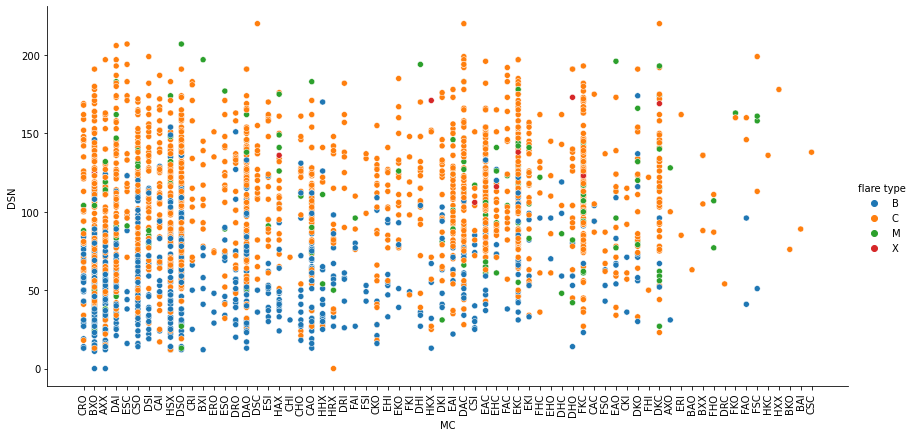

In [38]:
s=sns.relplot(x='MC',y='DSN',hue='flare type',data=df,height=6,aspect=2)
s.set_xticklabels(rotation=90)

[[<matplotlib.axis.XTick at 0x14ebe809210>,
 [Text(0, 0, 'B'), Text(1, 0, 'C'), Text(2, 0, 'M'), Text(3, 0, 'X')]]

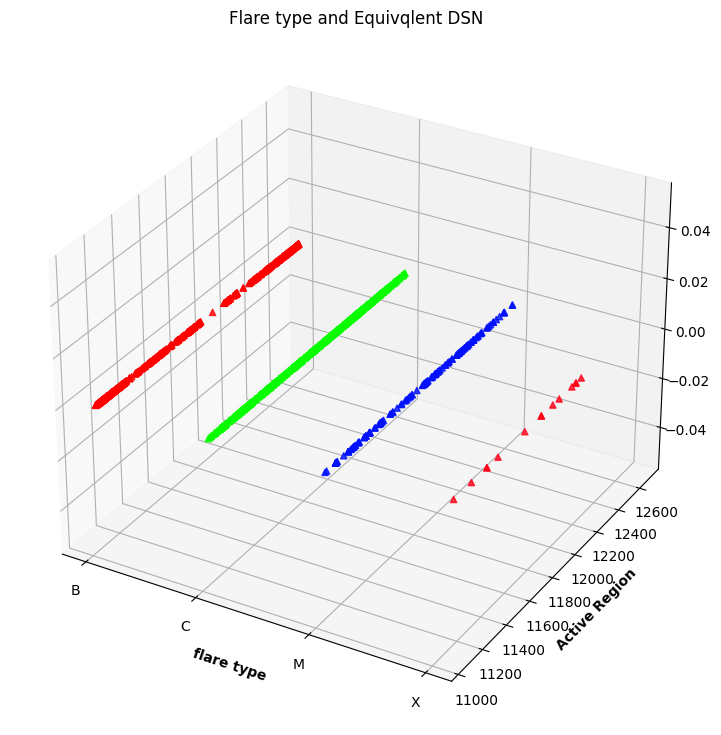

In [39]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
my_cmap = plt.get_cmap('hsv')
y=df['AR_Number']
le=LabelEncoder()
x=le.fit_transform(df['flare type']) 
sctt = ax.scatter3D(x,y,c=x,alpha = 0.8,cmap = my_cmap,marker ='^')
plt.title("Flare type and Equivqlent DSN")
ax.set_xlabel('flare type', fontweight ='bold')
ax.set_ylabel('Active Region', fontweight ='bold')

r=['B','C','M','X']
ax.set(xticks=range(len(r)), xticklabels=r)


<AxesSubplot:xlabel='flare type', ylabel='Count'>

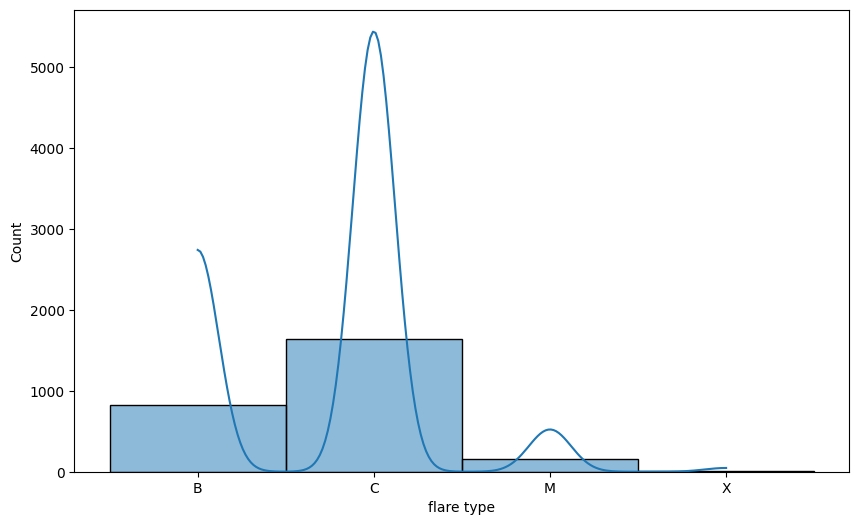

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='flare type',kde=True)

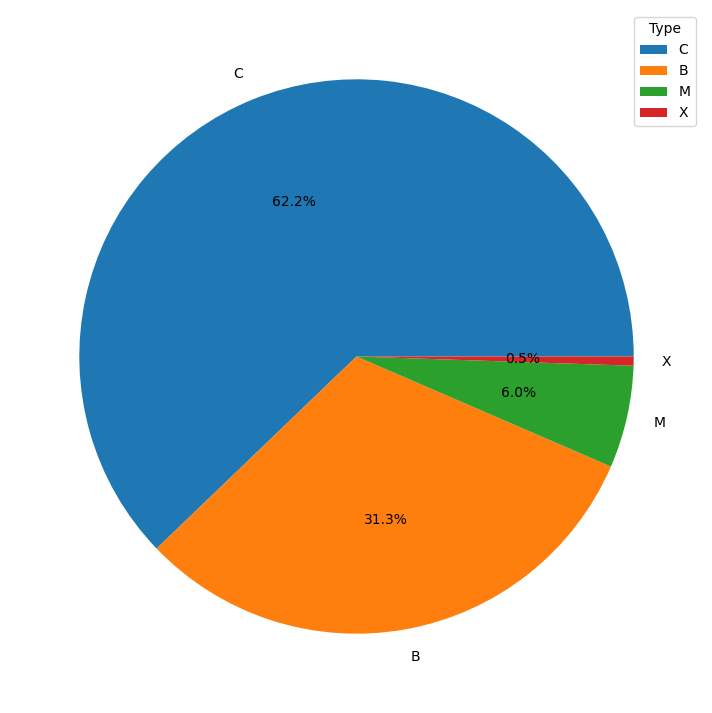

In [41]:
s=dict(df['flare type'].value_counts())
plt.figure(figsize=(15,9))
plt.pie(s.values(),labels=s.keys(),autopct='%1.1f%%')
plt.legend(title='Type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'CRO'),
  Text(1, 0, 'BXO'),
  Text(2, 0, 'AXX'),
  Text(3, 0, 'DAI'),
  Text(4, 0, 'ESC'),
  Text(5, 0, 'CSO'),
  Text(6, 0, 'DSI'),
  Text(7, 0, 'CAI'),
  Text(8, 0, 'HSX'),
  Text(9, 0, 'DSO'),
  Text(10, 0, 'CRI'),
  Text(11, 0, 'BXI'),
  Text(12, 0, 'ERO'),
  Text(13, 0, 'ESO'),
  Text(14, 0, 'DRO'),
  Text(15, 0, 'DAO'),
  Text(16, 0, 'DSC'),
  Text(17, 0, 'ESI'),
  Text(18, 0, 'HAX'),
  Text(19, 0, 'CHI'),
  Text(20, 0, 'CHO'),
  Text(21, 0, 'CAO'),
  Text(22, 0, 'HHX'),
  Text(23, 0, 'HRX'),
  Text(24, 0, 'DRI'),
  Text(25, 0, 'FAI'),
  Text(26, 0, 'FSI'),
  Text(27, 0, 'CKO'),
  Text(28, 0, 'EHI'),
  Text(29, 0, 'EKO'),
  Text(30, 0, 'FKI'),
  Text(31, 0, 'DHI'),


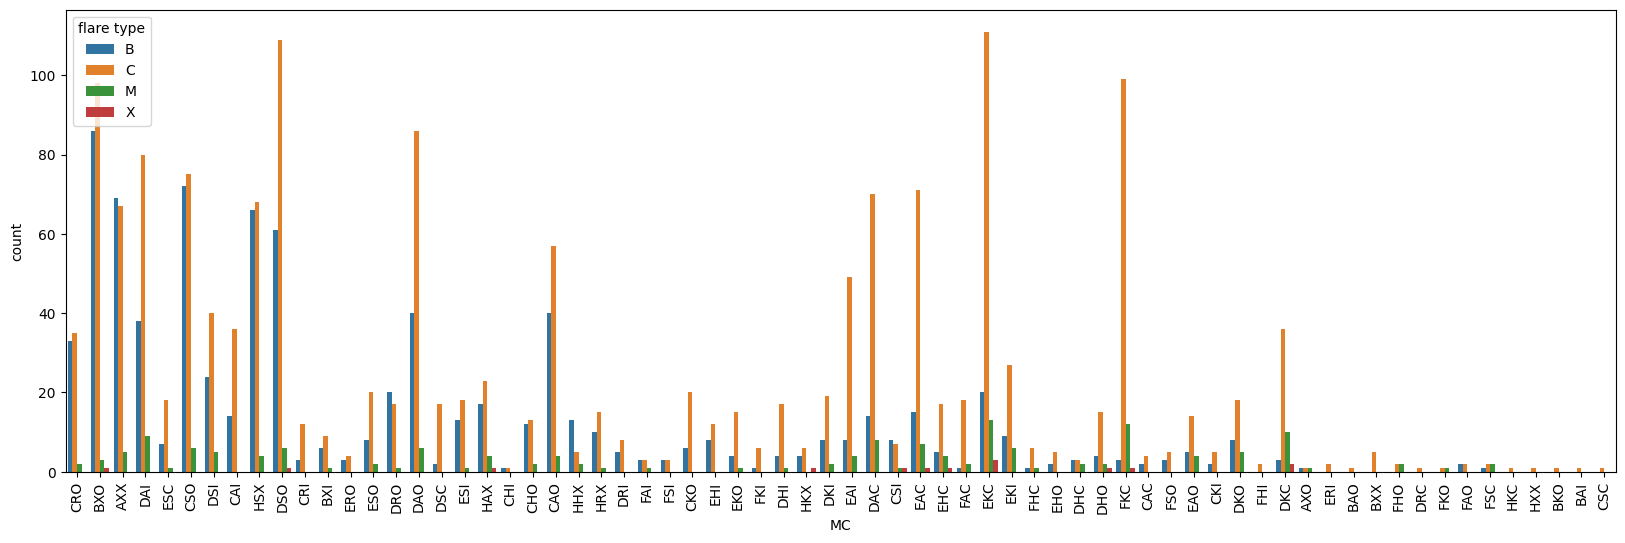

In [42]:
plt.figure(figsize=(20,6))
s=sns.countplot(data=df,x='MC',hue='flare type')
plt.xticks(rotation=90)


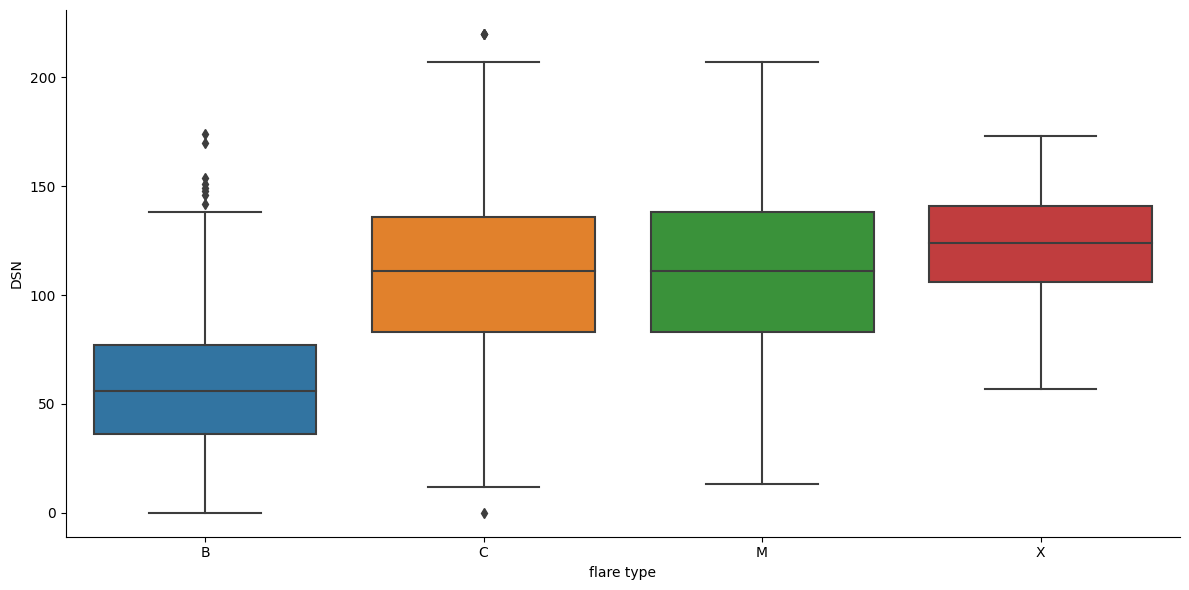

In [43]:
sns.factorplot(x='flare type',y='DSN',data=df,kind='box',height=6,aspect=2)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138],
 [Text(0, 0, 'N16E'),
  Text(1, 0, 'N23E'),
  Text(2, 0, 'N17W'),
  Text(3, 0, 'S27E'),
  Text(4, 0, 'S18E'),
  Text(5, 0, 'S26W'),
  Te

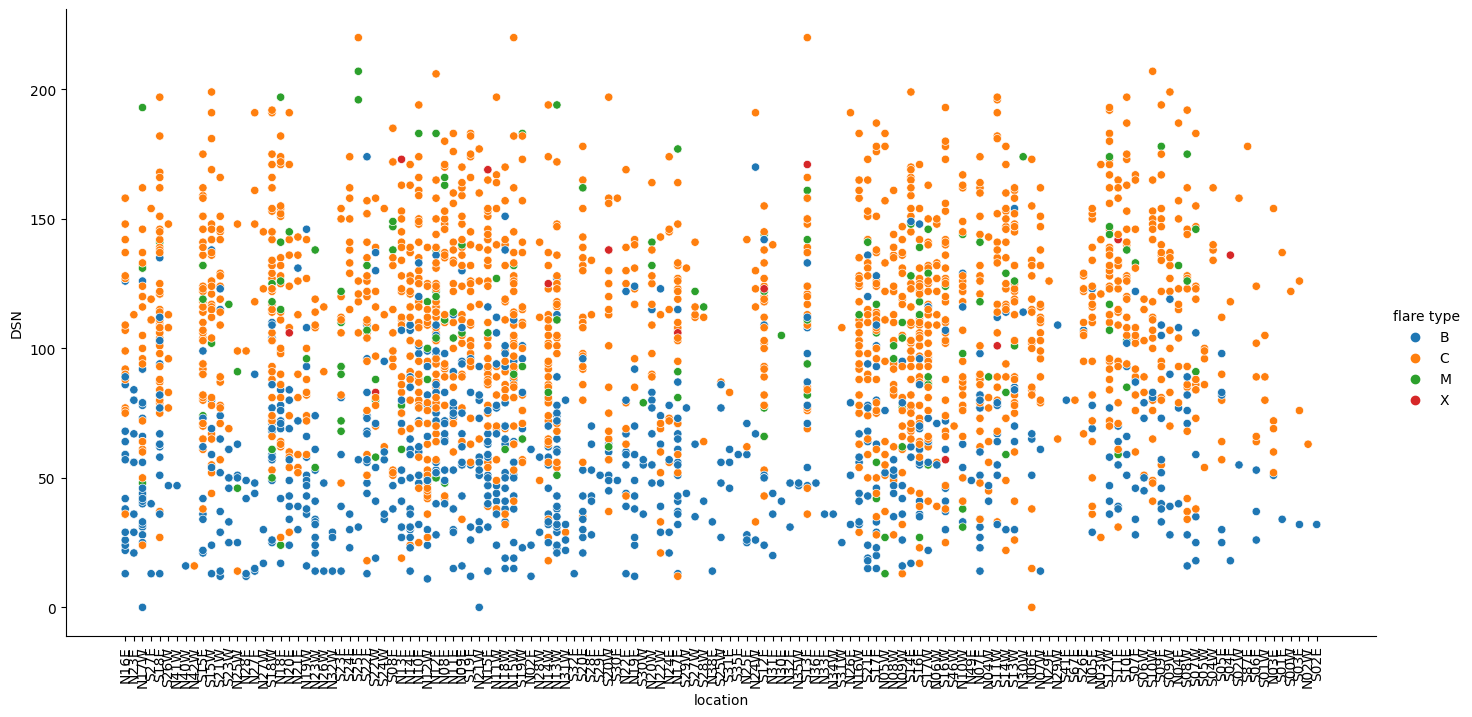

In [44]:
sns.relplot(data=df,x='location',y='DSN',hue='flare type',height=7,aspect=2)
plt.xticks(rotation=90)

[[<matplotlib.axis.XTick at 0x14ebef844f0>,
 [Text(0, 0, 'B'), Text(1, 0, 'C'), Text(2, 0, 'M'), Text(3, 0, 'X')]]

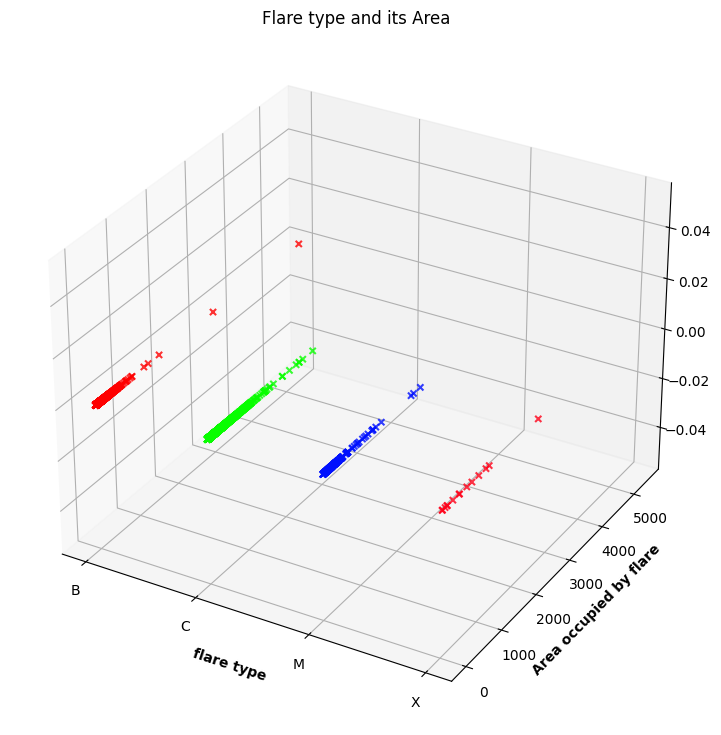

In [45]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
my_cmap = plt.get_cmap('hsv')
y=df['area']
le=LabelEncoder()
x=le.fit_transform(df['flare type']) 
sctt = ax.scatter3D(xs=x,ys=y,c=x,alpha = 0.8,cmap = my_cmap,marker ='x')
plt.title("Flare type and its Area")
ax.set_xlabel('flare type', fontweight ='bold')
ax.set_ylabel('Area occupied by flare', fontweight ='bold')

r=['B','C','M','X']
ax.set(xticks=range(len(r)), xticklabels=r)


[[<matplotlib.axis.XTick at 0x14ebedfc100>,
 [Text(0, 0, 'B'),
  Text(1, 0, 'A'),
  Text(2, 0, 'G'),
  Text(3, 0, 'BG'),
  Text(4, 0, 'BGD'),
  Text(5, 0, 'BD'),
  Text(6, 0, 'GD')]]

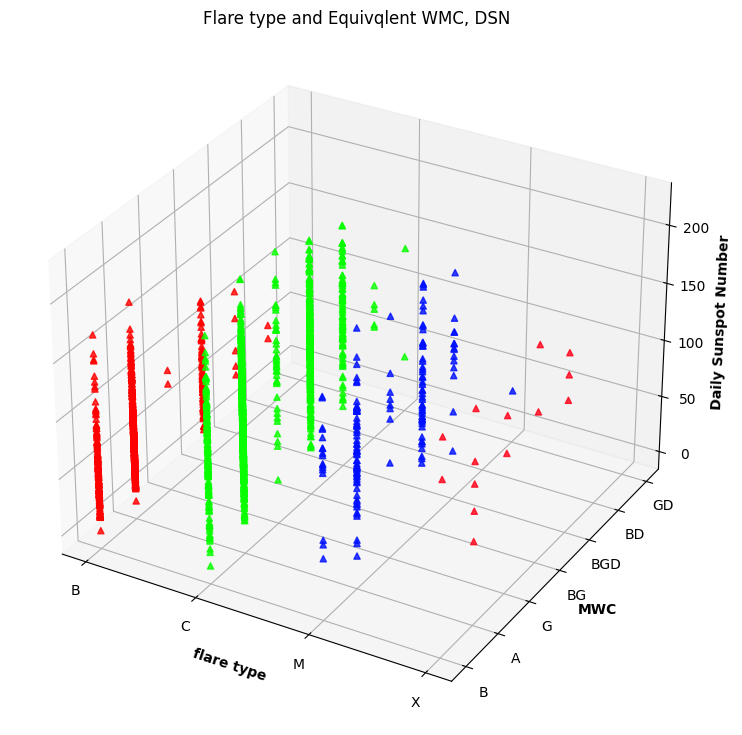

In [46]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
my_cmap = plt.get_cmap('hsv')
y=df['DSN']
le=LabelEncoder()
x=le.fit_transform(df['flare type'])
le=LabelEncoder()
z=le.fit_transform(df['WMC'])  

sctt = ax.scatter3D(x,z,y,c=x,alpha = 0.8,cmap = my_cmap,marker ='^')
plt.title("Flare type and Equivqlent WMC, DSN")
ax.set_xlabel('flare type', fontweight ='bold')
ax.set_ylabel('MWC', fontweight ='bold')
ax.set_zlabel('Daily Sunspot Number', fontweight ='bold')

r=['B','C','M','X']
ax.set(xticks=range(len(r)), xticklabels=r)
w=['B','A','G','BG','BGD','BD','GD']
ax.set(yticks=range(len(w)), yticklabels=w)


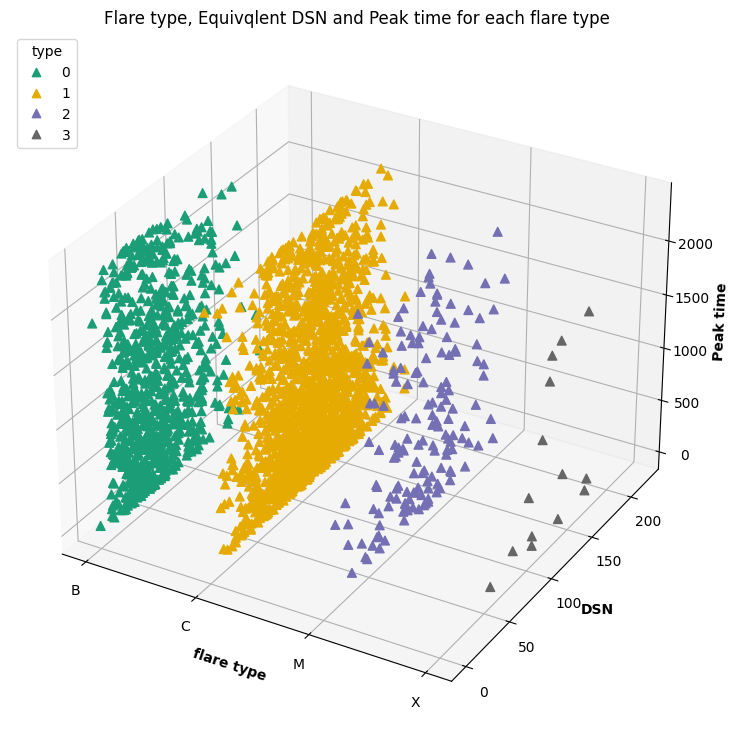

In [47]:
le=LabelEncoder()
x=le.fit_transform(df['flare type'])
z=df['peak time'] 
y=df['DSN']
r=['B','C','M','X']
fig = plt.figure(figsize = (15, 9))
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("Dark2", 256).as_hex())
sc = ax.scatter(x, y, z, s=40,c=x,  marker='^', cmap=cmap, alpha=1)
plt.title("Flare type, Equivqlent DSN and Peak time for each flare type")
ax.set_xlabel('flare type', fontweight ='bold')
ax.set_ylabel('DSN', fontweight ='bold')
ax.set_zlabel('Peak time', fontweight ='bold')
ax.set(xticks=range(len(r)), xticklabels=r)
plt.legend(*sc.legend_elements(),title='type', loc=2)


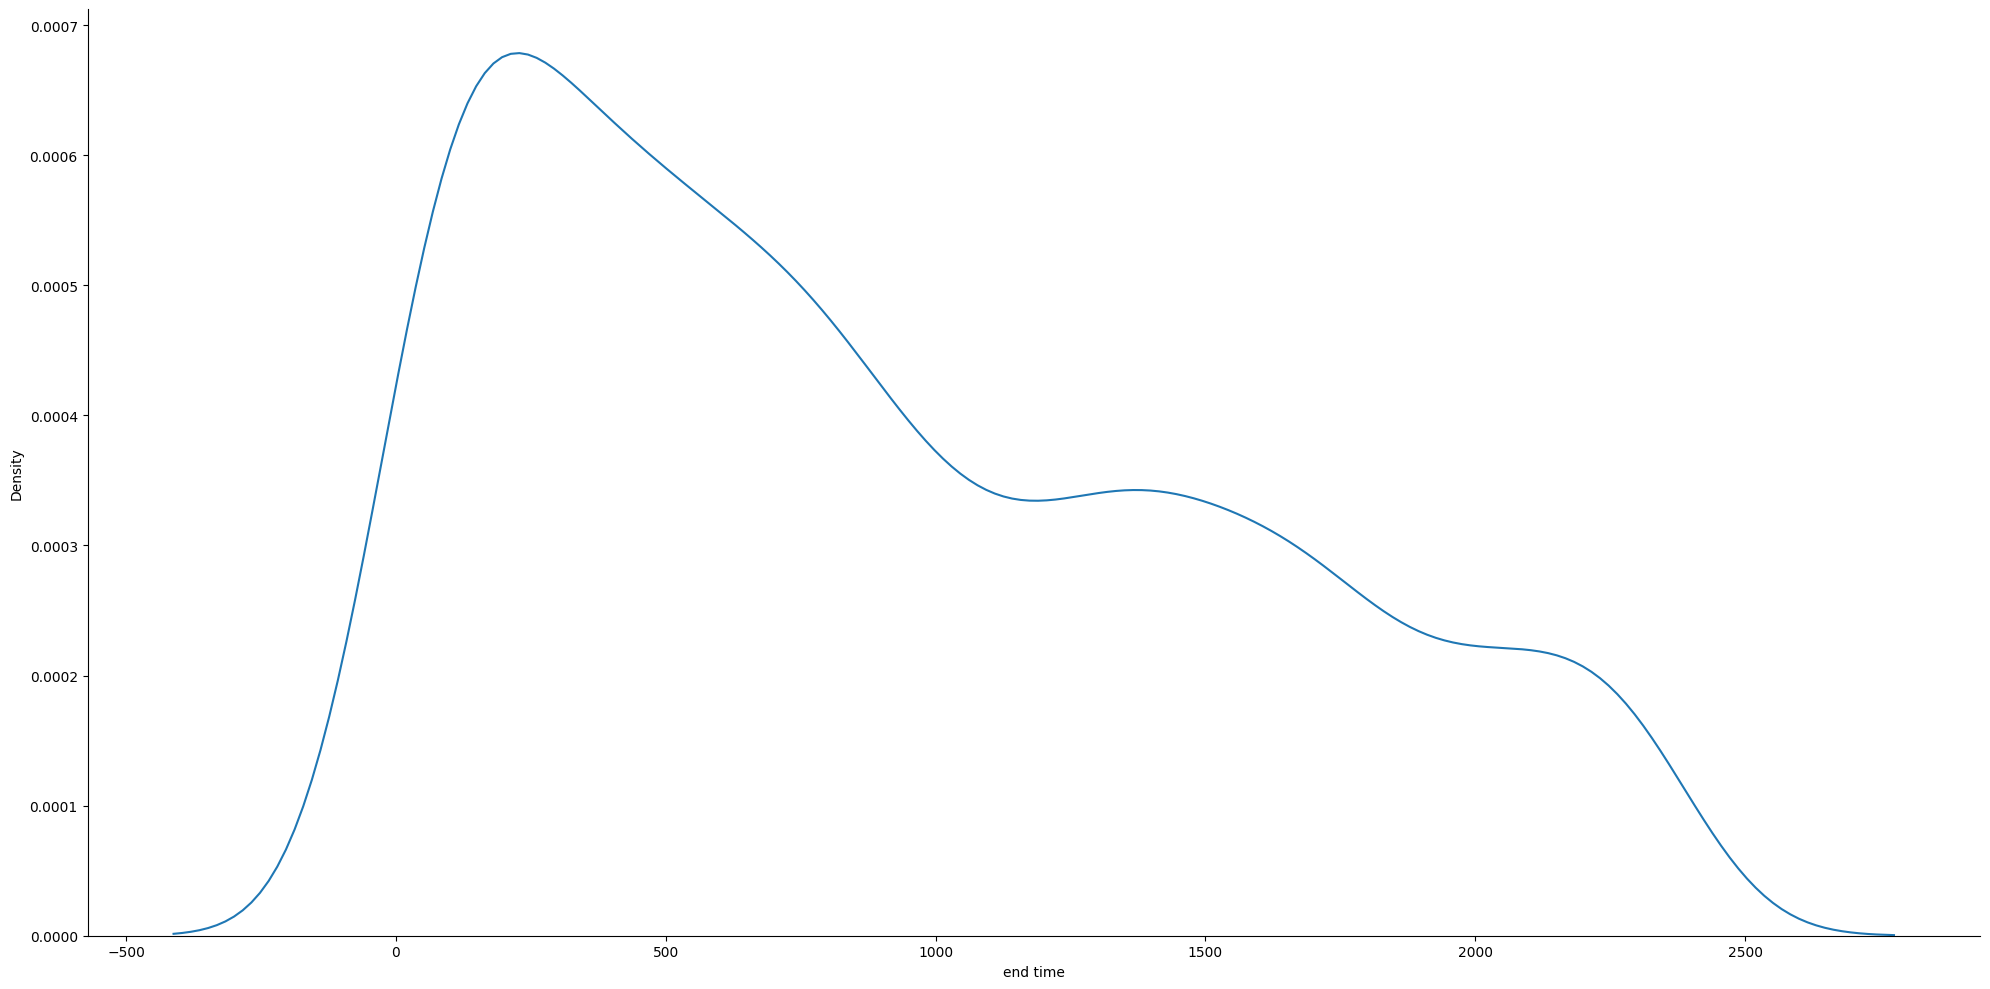

In [48]:
sns.displot(data=df,x='end time',kind='kde',height=10,aspect=2)

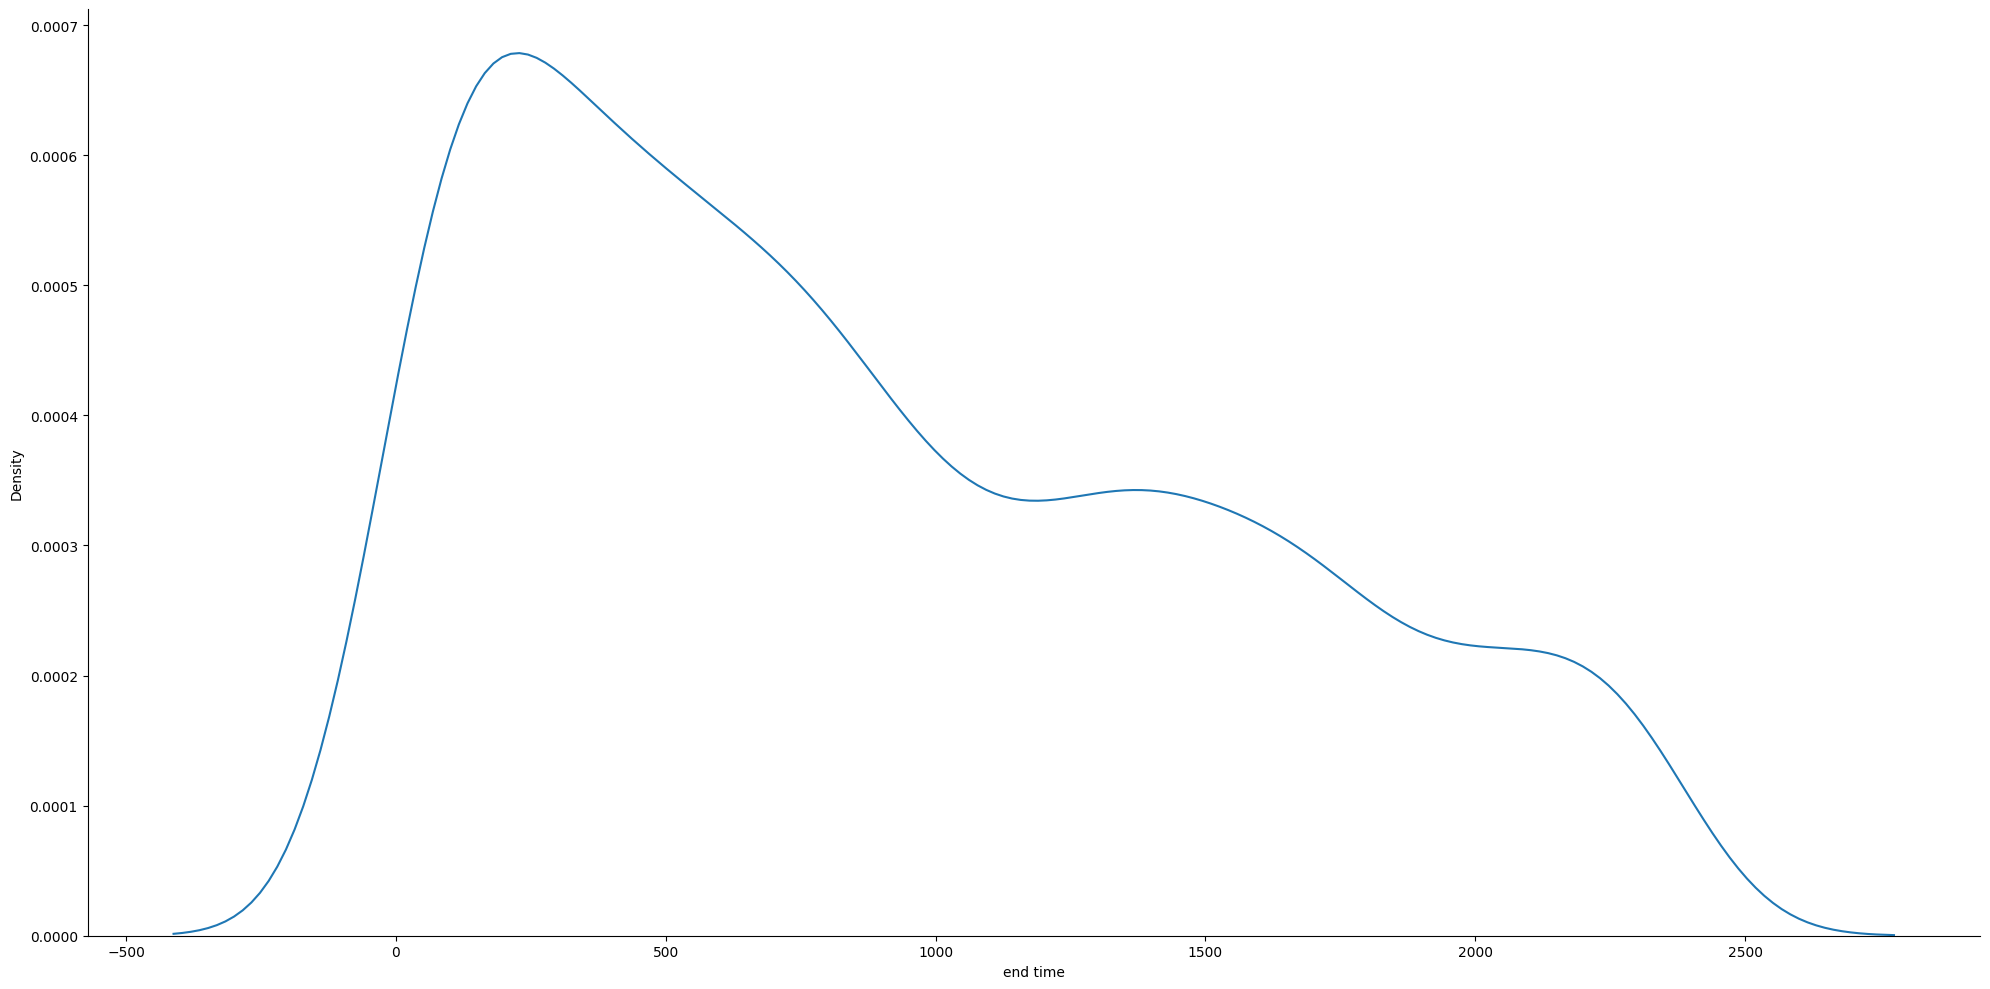

In [49]:
sns.displot(data=df,x='end time',kind='kde',height=10,aspect=2)